In [184]:
from sklearn.manifold import TSNE
from transformers import AutoTokenizer, AutoModel, T5EncoderModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

In [185]:


model_name = "microsoft/codebert-base"  # You can change this to any other model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


In [186]:
def embed_code(snippet):
    tokens = tokenizer(snippet, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        output = model(**tokens)
    # Use CLS token representation (standard)
    return output.last_hidden_state[:, 0, :].squeeze()



code_db = {}  # Dictionary to store embeddings

def add_code(name,problem, code):
    embedding = embed_code(code)
    code_db[name] = embedding
    code_db[name].problem = problem

    print(f"Added {name}")

def compare_codes(name1, name2):
    emb1 = code_db[name1].unsqueeze(0)
    emb2 = code_db[name2].unsqueeze(0)
    similarity = cosine_similarity(emb1.numpy(), emb2.numpy())[0][0]
    print(f"Cosine similarity between '{name1}' and '{name2}': {similarity:.4f}")
    return similarity


In [187]:
df = pd.read_csv("/home/profniggastein/PycharmProjects/embeddingstudy/sampled_per_problem.csv")
for index, row in df.iterrows():
    name = f"{row['submission_id']}_{row['problem_id']}"
    problem = row['problem_id'] if pd.notnull(row['problem_id']) else "No summary available"
    code = row['code'] if pd.notnull(row['code']) else ""
    add_code(name, problem, code)
df


Added s346655530_p00000
Added s636982314_p00000
Added s913000658_p00000
Added s192008613_p00000
Added s836001534_p00000
Added s599232960_p00000
Added s229329029_p00000
Added s652254667_p00000
Added s675829365_p00000
Added s256150330_p00000
Added s441763398_p00001
Added s102927004_p00001
Added s488757757_p00001
Added s468401260_p00001
Added s215491518_p00001
Added s517670939_p00001
Added s770975946_p00001
Added s367924941_p00001
Added s710133052_p00001
Added s823826767_p00001
Added s966929830_p00002
Added s003855013_p00002
Added s632636695_p00002
Added s188424736_p00002
Added s261910242_p00002
Added s597547245_p00002
Added s736818231_p00002
Added s640101878_p00002
Added s347606979_p00002
Added s885715109_p00002
Added s613963458_p00003
Added s865223077_p00003
Added s828934034_p00003
Added s796642372_p00003
Added s219114469_p00003
Added s090234153_p00003
Added s521933427_p00003
Added s417266307_p00003
Added s569902922_p00003
Added s473783877_p00003
Added s821213494_p00004
Added s045517183

,Unnamed: 0,index,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,...,memory,code_size,accuracy,Correct/incorrect,submission_idstr,problem_idstr,test_path,sum_path,code,summary
0,4946,8511,s346655530,p00000,u011621222,1404112472,C++,C++,cpp,Accepted,...,924.0,147,1/1,1,s346655530,p00000,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include<stdio.h>\nint main()\n{\n for(int ...,Here's the code summary for the given problem ...
1,4974,8539,s636982314,p00000,u252588925,1405756598,C++,C++11,cpp,Accepted,...,1152.0,270,1/1,1,s636982314,p00000,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\n\nint main() {\n std::...,Here's the code summary for the given problem ...
2,8354,11919,s913000658,p00000,u195794119,1301891277,C++,C++,cpp,Accepted,...,0.0,185,NaN,1,s913000658,p00000,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,"#include <iostream>\n\nint main(int argc, char...",Here's the code summary for the given problem ...
3,5119,8684,s192008613,p00000,u642549559,1415356028,C++,C++,cpp,Accepted,...,1120.0,893,1/1,1,s192008613,p00000,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\n#include <string>\n#inclu...,Here's the code summary for the given problem ...
4,6882,10447,s836001534,p00000,u890265381,1473418612,C++,C++,cpp,Accepted,...,1116.0,451,1/1,1,s836001534,p00000,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\n#include <algorithm>\n#in...,Here's the code summary for the given problem ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,47814,3961,s185228264,p00006,u268155858,1460376186,C++,C++,cpp,Accepted,...,1172.0,194,1/1,1,s185228264,p00006,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\n#include <string>\nusing ...,"Here's the code summary for the ""Reverse Seque..."
66,47526,3673,s033206048,p00006,u542962065,1432253745,C++,C++,cpp,Accepted,...,1172.0,405,1/1,1,s033206048,p00006,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,"#include ""bits/stdc++.h""\n\nusing namespace st...","Here's the code summary for the ""Reverse Seque..."
67,48729,4876,s999045003,p00006,u211630862,1315469896,C++,C++,cpp,Accepted,...,0.0,181,NaN,1,s999045003,p00006,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\nusing namespace std;\n\ni...,"Here's the code summary for the ""Reverse Seque..."
68,48576,4723,s271451911,p00006,u146477988,1530533134,C++,C++,cpp,Accepted,...,3152.0,201,1/1,1,s271451911,p00006,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\n#include <string>\nusing ...,"Here's the code summary for the ""Reverse Seque..."


In [188]:

def fillcolorcolumn():
    df['Colour'] = df['problem_id'].apply(lambda x: f'#{hash(x) & 0xFFFF00:06x}')

    return df


In [189]:
fillcolorcolumn()
df

,Unnamed: 0,index,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,...,code_size,accuracy,Correct/incorrect,submission_idstr,problem_idstr,test_path,sum_path,code,summary,Colour
0,4946,8511,s346655530,p00000,u011621222,1404112472,C++,C++,cpp,Accepted,...,147,1/1,1,s346655530,p00000,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include<stdio.h>\nint main()\n{\n for(int ...,Here's the code summary for the given problem ...,#1dc800
1,4974,8539,s636982314,p00000,u252588925,1405756598,C++,C++11,cpp,Accepted,...,270,1/1,1,s636982314,p00000,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\n\nint main() {\n std::...,Here's the code summary for the given problem ...,#1dc800
2,8354,11919,s913000658,p00000,u195794119,1301891277,C++,C++,cpp,Accepted,...,185,NaN,1,s913000658,p00000,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,"#include <iostream>\n\nint main(int argc, char...",Here's the code summary for the given problem ...,#1dc800
3,5119,8684,s192008613,p00000,u642549559,1415356028,C++,C++,cpp,Accepted,...,893,1/1,1,s192008613,p00000,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\n#include <string>\n#inclu...,Here's the code summary for the given problem ...,#1dc800
4,6882,10447,s836001534,p00000,u890265381,1473418612,C++,C++,cpp,Accepted,...,451,1/1,1,s836001534,p00000,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\n#include <algorithm>\n#in...,Here's the code summary for the given problem ...,#1dc800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,47814,3961,s185228264,p00006,u268155858,1460376186,C++,C++,cpp,Accepted,...,194,1/1,1,s185228264,p00006,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\n#include <string>\nusing ...,"Here's the code summary for the ""Reverse Seque...",#163d00
66,47526,3673,s033206048,p00006,u542962065,1432253745,C++,C++,cpp,Accepted,...,405,1/1,1,s033206048,p00006,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,"#include ""bits/stdc++.h""\n\nusing namespace st...","Here's the code summary for the ""Reverse Seque...",#163d00
67,48729,4876,s999045003,p00006,u211630862,1315469896,C++,C++,cpp,Accepted,...,181,NaN,1,s999045003,p00006,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\nusing namespace std;\n\ni...,"Here's the code summary for the ""Reverse Seque...",#163d00
68,48576,4723,s271451911,p00006,u146477988,1530533134,C++,C++,cpp,Accepted,...,201,1/1,1,s271451911,p00006,/home/profniggastein/PycharmProjects/ReducedDa...,/home/profniggastein/PycharmProjects/ReducedDa...,#include <iostream>\n#include <string>\nusing ...,"Here's the code summary for the ""Reverse Seque...",#163d00


In [190]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

def plot_embeddings():
    names = list(code_db.keys())
    embeddings = torch.stack([code_db[name] for name in names]).numpy()

    # Perform dimensionality reduction
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)

    plt.figure(figsize=(20, 10))

    for i, name in enumerate(names):
        # Extract the color from the DataFrame
        submission_id, problem_id = name.split("_", 1)
        row = df[(df['submission_id'].astype(str) == submission_id) & (df['problem_id'] == problem_id)]

        if not row.empty:
            color = row.iloc[0]['Colour']
        else:
            color = 'black'  # fallback color for unmatched entries

        plt.scatter(reduced[i, 0], reduced[i, 1], color=color)
        plt.text(reduced[i, 0] + 0.01, reduced[i, 1] + 0.01, name, fontsize=9)

    plt.title("Code Embeddings (PCA)CODENET(CodeBERT)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("PCA_Projection_of_CodeNET(CodeBERT).pdf")
    plt.show()

def plot_embeddings_tsne():
    names = list(code_db.keys())
    embeddings = torch.stack([code_db[name] for name in names]).numpy()



    tsne = TSNE(n_components=2, random_state=0)


    reduced = tsne.fit_transform(embeddings)

    plt.figure(figsize=(20, 10))

    for i, name in enumerate(names):
        # Extract the color from the DataFrame
        submission_id, problem_id = name.split("_", 1)
        row = df[(df['submission_id'].astype(str) == submission_id) & (df['problem_id'] == problem_id)]
        if not row.empty:
            color = row.iloc[0]['Colour']
        else:
            color = 'black'  # fallback color for unmatched entries
        plt.scatter(reduced[i, 0], reduced[i, 1], color=color)
        plt.text(reduced[i, 0] + 0.01, reduced[i, 1] + 0.01, name, fontsize=9)
    plt.title("Code Embeddings (TSNE)Codenet(CodeBERT)")
    plt.grid(True)
    plt.savefig("TSNE_projection_of_Codenet(CodeBERT).pdf")
    plt.show()

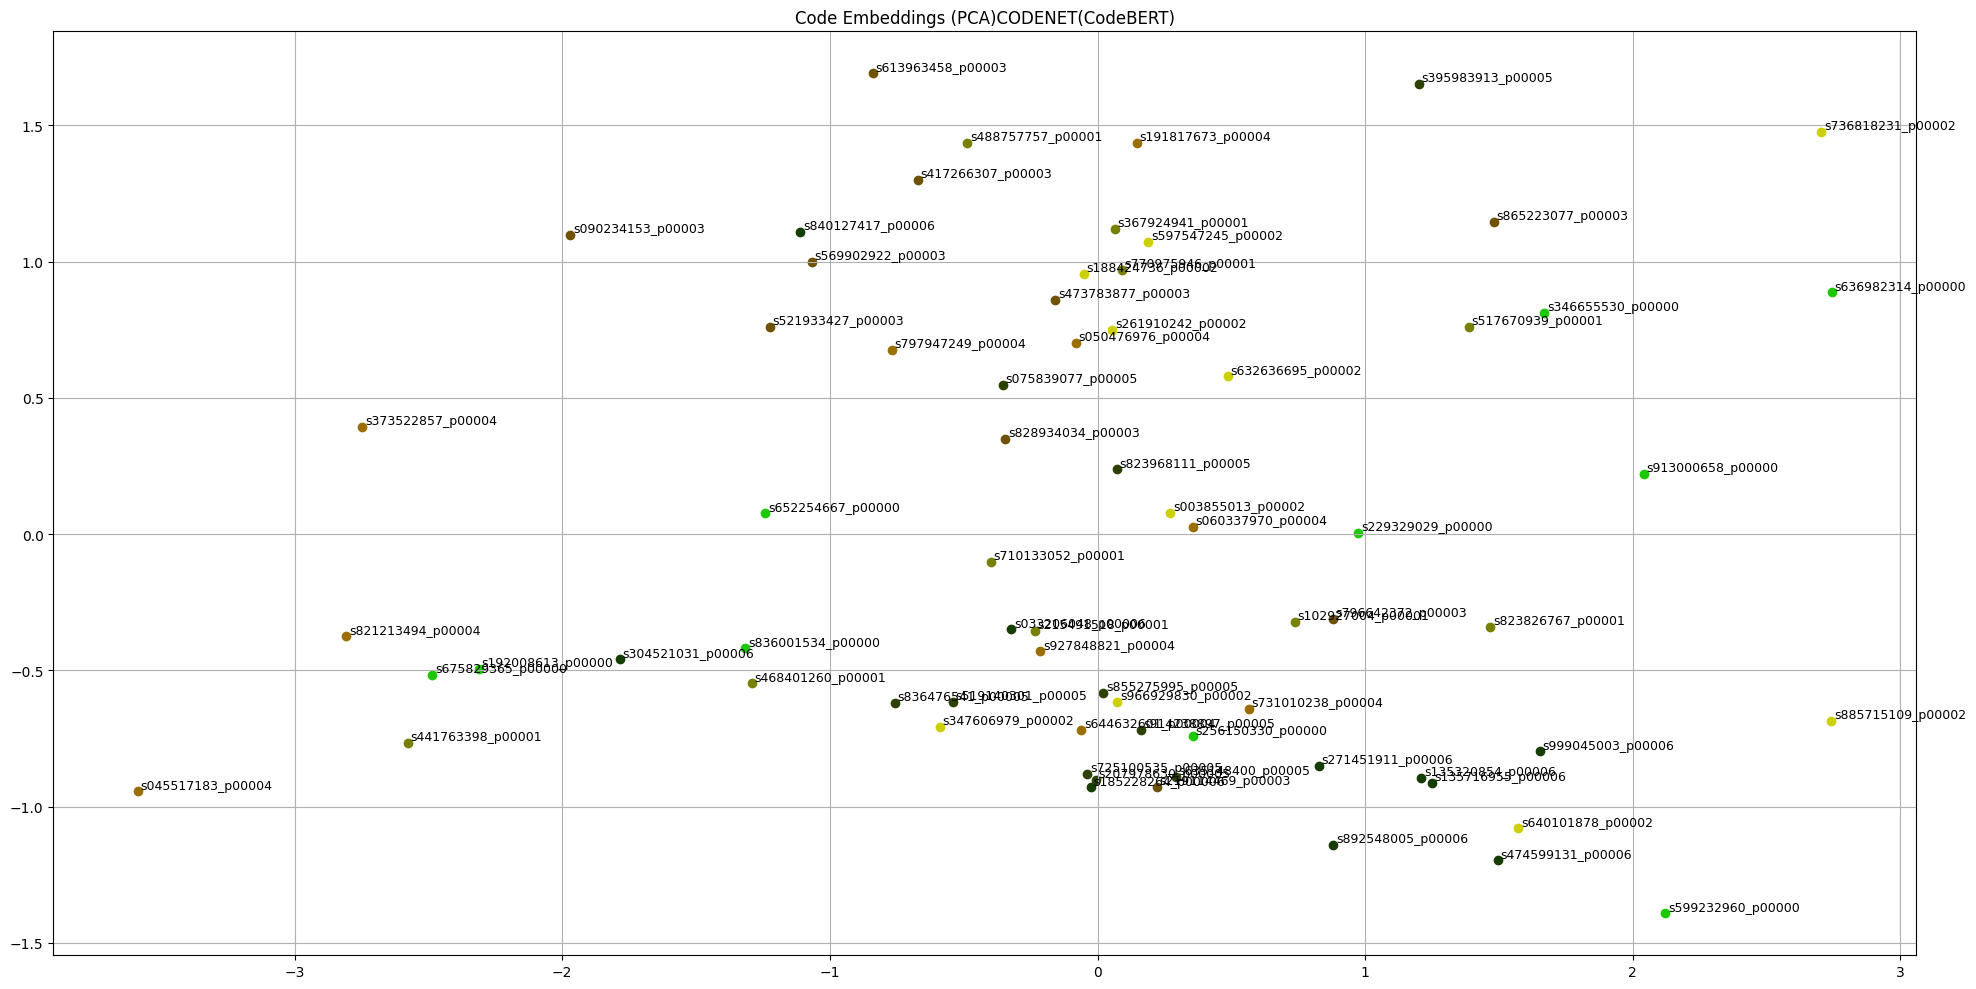

In [191]:
plot_embeddings()

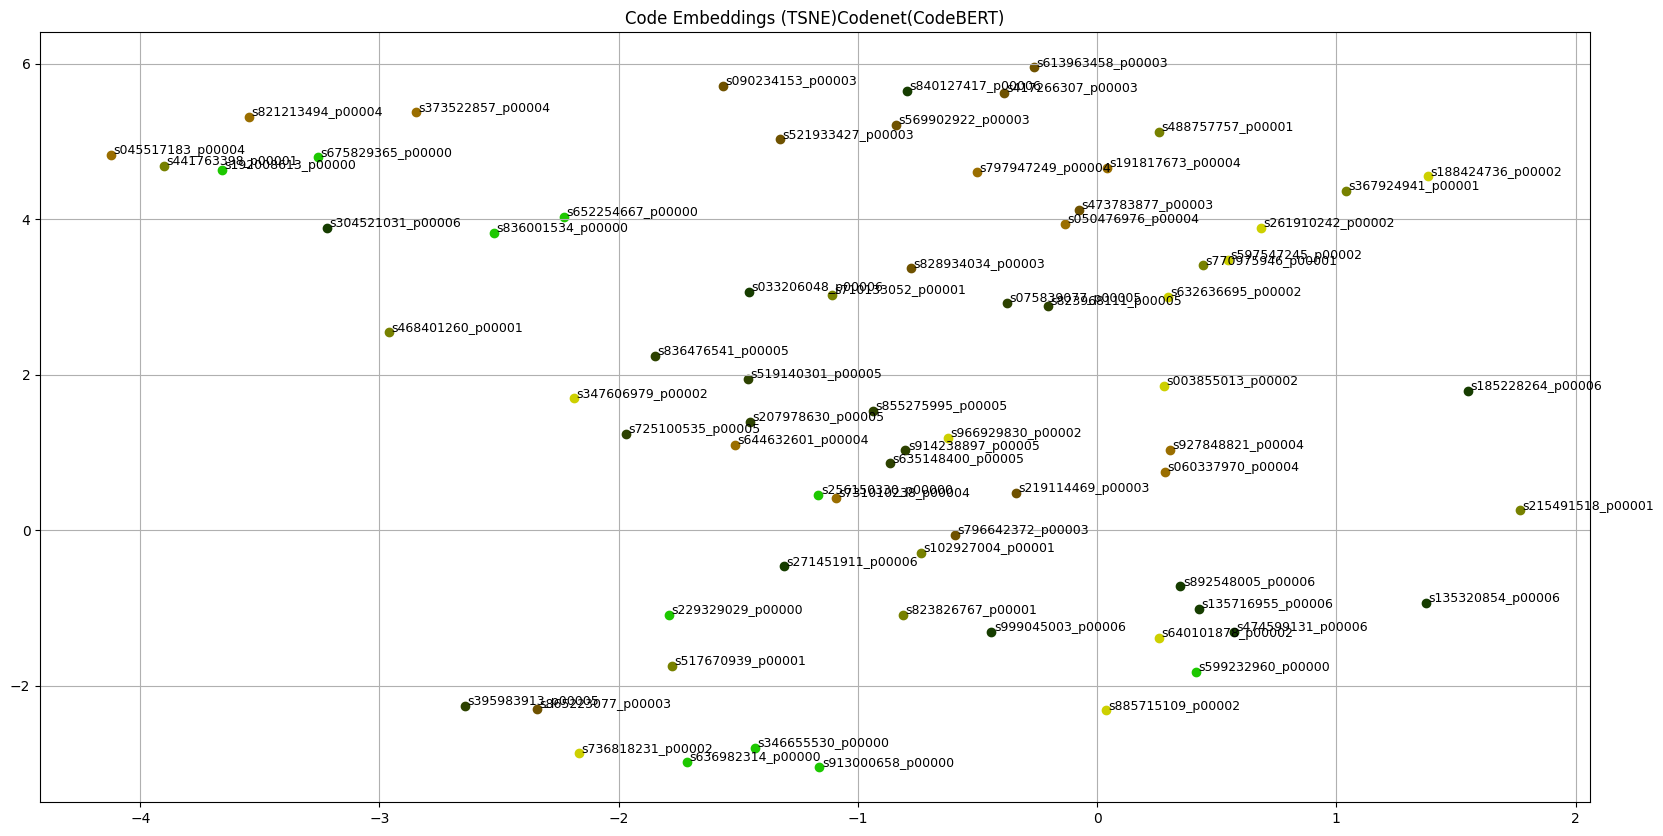

In [192]:
plot_embeddings_tsne()

In [193]:
# from torch.utils.tensorboard import SummaryWriter
# import os
# import datetime
#
# # Create a timestamped directory for logs
# log_dir = os.path.join("runs", "code_embedding_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# writer = SummaryWriter(log_dir)


In [194]:
# def write_embeddings_to_tensorboard():
#     names = list(code_db.keys())
#     embeddings = torch.stack([code_db[name] for name in names])
#
#     writer.add_embedding(
#         embeddings,
#         metadata=names,
#         tag="code_snippets",
#         global_step=0  # Optional: allows tracking multiple embedding logs over time
#     )
#     writer.flush()
#     print(f"Embeddings written to TensorBoard at {log_dir}")


In [195]:
#write_embeddings_to_tensorboard()

In [196]:
compare_codes('s832811223','s115719540')

KeyError: 's832811223'